# 1.Principal Component Analysis

## 1-1. Preparation of dataset

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
!pip install -U scikit-learn 
from sklearn.datasets import load_iris
dataset = load_iris()


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/63/87/6cd5450f0385966bf2a5b865a2043cf68c2a41676193afdbccb40f8719dc/scikit_learn-1.3.0-cp39-cp39-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/77/31/b063f21370c6050a663aae5a9868d2fe112b21caeface3c248016dfea092/scipy-1.11.2-cp39-cp39-macosx_12_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 5.4 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-

In [14]:
x = dataset.data
t = dataset.target
feature_names = dataset.feature_names
print(len(x),len(t))
pd.DataFrame(x, columns=feature_names).head()


150 150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 1-2. Define and train model
- n_components: The dimension after dimensionality reduction

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)

In [10]:
# Training of the model
pca.fit(x)
# Check the Covariance
pca.get_covariance()



array([[ 0.67918961, -0.03571514,  1.2714061 ,  0.53137208],
       [-0.03571514,  0.18303922, -0.32672469, -0.13706322],
       [ 1.2714061 , -0.32672469,  3.12237957,  1.28464626],
       [ 0.53137208, -0.13706322,  1.28464626,  0.58834865]])

In [12]:
x_transformed = pca.transform(x)
pd.DataFrame(x_transformed, columns=['第一主成分', '第二主成分']).head(10)



,第一主成分,第二主成分
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
5,-2.280860,0.741330
6,-2.820538,-0.089461
7,-2.626145,0.163385
8,-2.886383,-0.578312
9,-2.672756,-0.113774


In [15]:
print('第一主成分の寄与率：{}'.format(pca.explained_variance_ratio_[0]))
print('第二主成分の寄与率：{}'.format(pca.explained_variance_ratio_[1]))


第一主成分の寄与率：0.9246187232017271
第二主成分の寄与率：0.053066483117067825


In [16]:
np.unique(t)


array([0, 1, 2])

<Axes: >

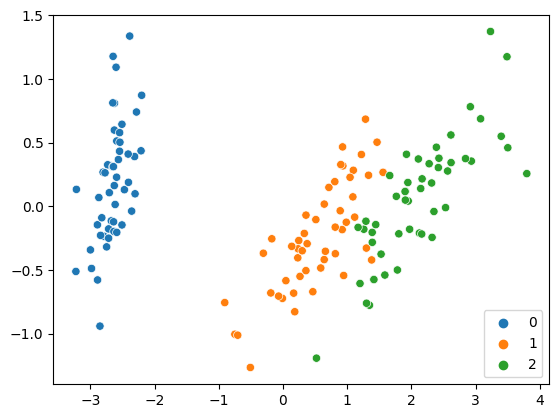

In [24]:
sns.scatterplot(x=x_transformed[:, 0], y=x_transformed[:, 1], hue=t, palette=sns.color_palette(n_colors=3))

In [26]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
pca = PCA(n_components=2, random_state=0)
x_std_transformed = pca.fit_transform(x_scaled)
pd.DataFrame(x_std_transformed, columns=['第一主成分', '第二主成分']).head(10)



,第一主成分,第二主成分
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
5,-2.075631,1.489178
6,-2.444029,0.047644
7,-2.232847,0.223148
8,-2.334640,-1.115328
9,-2.184328,-0.469014


In [27]:
print('第一主成分の寄与率：{}'.format(pca.explained_variance_ratio_[0]))
print('第二主成分の寄与率：{}'.format(pca.explained_variance_ratio_[1]))

第一主成分の寄与率：0.7296244541329985
第二主成分の寄与率：0.2285076178670179


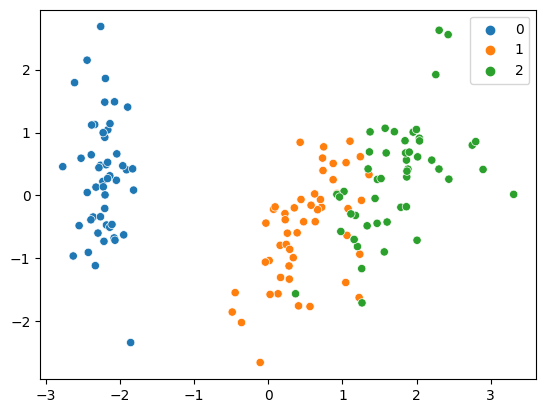

In [28]:
sns.scatterplot(x = x_std_transformed[:, 0], y = x_std_transformed[:, 1], hue=t, palette=sns.color_palette(n_colors=3));

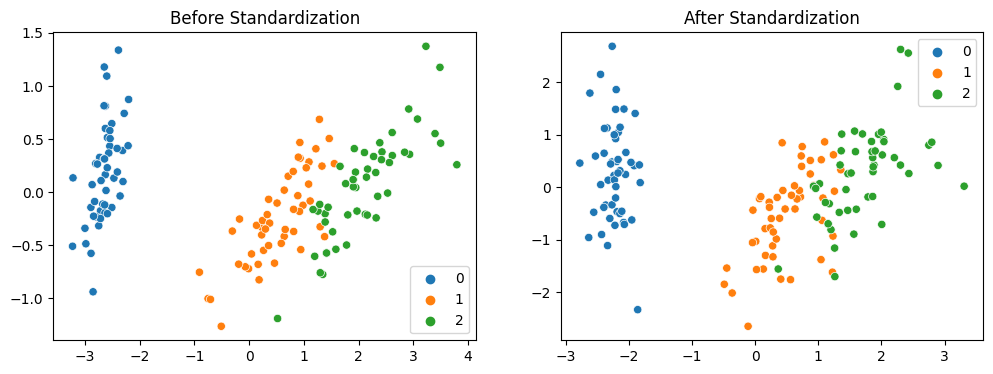

In [42]:
fig = plt.figure(figsize=(12,4))

# 標準化適用前
ax1 = fig.add_subplot(1, 2, 1)
sns.scatterplot(x = x_transformed[:, 0], y = x_transformed[:, 1], hue=t, palette=sns.color_palette(n_colors=3));
ax1.set_title('Before Standardization')

# 標準化適用後
ax2 = fig.add_subplot(1, 2, 2)
sns.scatterplot(x = x_std_transformed[:, 0], y = x_std_transformed[:, 1], hue=t, palette=sns.color_palette(n_colors=3));
ax2.set_title('After Standardization');

# 2. k-means

## 2-1. Preparation of dataset

In [46]:
      
df = pd.read_csv("convinience_store.csv")
df.head(3)

,No,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ
0,1,25350,3650,8945,0,4867,8945
1,2,24500,0,0,1827,0,0
2,3,23050,5750,11570,0,7667,11570


In [47]:
x = df.drop('No', axis=1).values
x[:3]

array([[25350,  3650,  8945,     0,  4867,  8945],
       [24500,     0,     0,  1827,     0,     0],
       [23050,  5750, 11570,     0,  7667, 11570]])

In [48]:
from sklearn.cluster import KMeans


In [49]:
# モデルの定義
kmeans = KMeans(n_clusters=3, random_state=0)

# モデルの学習
kmeans.fit(x)

/Users/rinomaki/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [50]:
kmeans.cluster_centers_


array([[ 5229.6875    ,  3513.8125    ,  7165.46875   ,  2137.0625    ,
         2525.25      ,  3583.        ],
       [28681.25      ,  5637.66666667,  1298.75      ,  1271.        ,
         1770.875     ,   716.95833333],
       [17714.28571429,  2614.35714286, 10648.57142857,   633.07142857,
         3485.85714286, 10135.35714286]])

In [51]:
kmeans.cluster_centers_.shape


(3, 6)

In [52]:
# クラスタリングの適用
cluster = kmeans.predict(ｘ)
cluster

array([2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [53]:
# データフレームの作成
df_cluster = df.copy() # データフレームをコピー
df_cluster['cluster'] = cluster
df_cluster.head()


,No,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ,cluster
0,1,25350,3650,8945,0,4867,8945,2
1,2,24500,0,0,1827,0,0,1
2,3,23050,5750,11570,0,7667,11570,2
3,4,22850,4100,10145,0,5467,10145,2
4,5,22500,0,0,0,0,0,1


In [55]:
# 空のデータフレームを作成
df_results = pd.DataFrame()
# クラスター 0 の平均値
df_cluster[df_cluster['cluster'] == 0].mean().tolist()

[37.34375, 5229.6875, 3513.8125, 7165.46875, 2137.0625, 2525.25, 3583.0, 0.0]

In [57]:
# 各クラスターの平均値を追加
df_results['cluster 0'] = df_cluster[df_cluster['cluster'] == 0].mean().tolist()
df_results['cluster 1'] = df_cluster[df_cluster['cluster'] == 1].mean().tolist()
df_results['cluster 2'] = df_cluster[df_cluster['cluster'] == 2].mean().tolist()
df_results


,cluster 0,cluster 1,cluster 2
0,37.34375,46.250000,12.857143
1,5229.68750,28681.250000,17714.285714
2,3513.81250,5637.666667,2614.357143
3,7165.46875,1298.750000,10648.571429
4,2137.06250,1271.000000,633.071429
5,2525.25000,1770.875000,3485.857143
6,3583.00000,716.958333,10135.357143
7,0.00000,1.000000,2.000000


In [58]:
# Index に列名を追加
df_results = df_results.set_index(df_cluster.columns) 

# 転置
df_results = df_results.drop(['No', 'cluster']).T
df_results


,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ
cluster 0,5229.687500,3513.812500,7165.468750,2137.062500,2525.250000,3583.000000
cluster 1,28681.250000,5637.666667,1298.750000,1271.000000,1770.875000,716.958333
cluster 2,17714.285714,2614.357143,10648.571429,633.071429,3485.857143,10135.357143
